In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uk_housing_market_data (1) - uk_housing_market_data (1).csv')

In [3]:
df.head()

,Property_ID,Location_City,Location_District,Listing_Date,Property_Type,Square_Footage,Bedrooms,Bathrooms,Year_Built,Build_Quality_Rating,Nearby_Amenities_Score,Market_Trend_Index,Sale_Price_GBP,Agent_Commission_Percentage,Days_On_Market,Transaction_Type,Revenue_Activity,Revenue_GBP_Monthly
0,BG-GUI-20240404-00001,Guildford,Park Barn,2024-04-04,Apartment,535,4,2,1991,1,2.0,1.08,397091.40,2.07,49,Sale,Sale Commission,684.98
1,BG-GUI-20200820-00002,Guildford,Stoughton,2020-08-20,Townhouse,3760,2,1,2006,1,7.0,0.85,1708043.02,2.30,105,Lease,Airbnb/Short Let,118517.69
2,BG-LON-20220707-00003,London,Croydon,2022-07-07,Apartment,3038,1,1,1966,6,7.0,1.10,1951322.16,2.38,35,Sale,Sale Commission,3870.12
3,BG-REA-20200313-00004,Reading,Kennet Island,2020-03-13,Detached House,2943,3,1,1977,4,6.0,0.93,1695932.42,1.94,74,Lease,Airbnb/Short Let,111895.23
4,BG-REA-20240117-00005,Reading,Kennet Island,2024-01-17,Detached House,3284,3,2,1976,2,1.0,1.09,1478518.07,1.88,111,Sale,Sale Commission,2316.34


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Property_ID                  10000 non-null  object 
 1   Location_City                10000 non-null  object 
 2   Location_District            10000 non-null  object 
 3   Listing_Date                 10000 non-null  object 
 4   Property_Type                10000 non-null  object 
 5   Square_Footage               10000 non-null  int64  
 6   Bedrooms                     10000 non-null  int64  
 7   Bathrooms                    10000 non-null  int64  
 8   Year_Built                   10000 non-null  int64  
 9   Build_Quality_Rating         10000 non-null  int64  
 10  Nearby_Amenities_Score       9603 non-null   float64
 11  Market_Trend_Index           10000 non-null  float64
 12  Sale_Price_GBP               10000 non-null  float64
 13  Agent_Commission_

In [5]:
df.isnull().sum()

,0
Property_ID,0
Location_City,0
Location_District,0
Listing_Date,0
Property_Type,0
Square_Footage,0
Bedrooms,0
Bathrooms,0
Year_Built,0
Build_Quality_Rating,0


In [6]:
df.drop(columns=['Property_ID', 'Nearby_Amenities_Score'], inplace=True)

In [7]:
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'])

# Extract useful date features
df['Listing_Year'] = df['Listing_Date'].dt.year
df['Listing_Month'] = df['Listing_Date'].dt.month
df['Days_Since_Listed'] = (pd.to_datetime('2025-08-27') - df['Listing_Date']).dt.days

In [8]:
df.isnull().sum()

,0
Location_City,0
Location_District,0
Listing_Date,0
Property_Type,0
Square_Footage,0
Bedrooms,0
Bathrooms,0
Year_Built,0
Build_Quality_Rating,0
Market_Trend_Index,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Location_City                10000 non-null  object        
 1   Location_District            10000 non-null  object        
 2   Listing_Date                 10000 non-null  datetime64[ns]
 3   Property_Type                10000 non-null  object        
 4   Square_Footage               10000 non-null  int64         
 5   Bedrooms                     10000 non-null  int64         
 6   Bathrooms                    10000 non-null  int64         
 7   Year_Built                   10000 non-null  int64         
 8   Build_Quality_Rating         10000 non-null  int64         
 9   Market_Trend_Index           10000 non-null  float64       
 10  Sale_Price_GBP               10000 non-null  float64       
 11  Agent_Commission_Percentage  10000 non-nul

# Exploratory Data Analysis

In [10]:
df.describe()

,Listing_Date,Square_Footage,Bedrooms,Bathrooms,Year_Built,Build_Quality_Rating,Market_Trend_Index,Sale_Price_GBP,Agent_Commission_Percentage,Days_On_Market,Revenue_GBP_Monthly,Listing_Year,Listing_Month,Days_Since_Listed
count,10000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2021-10-06 04:04:48,2234.457100,3.001000,2.015600,1985.64080,5.514100,1.035475,1.323053e+06,2.004522,91.810500,20425.781608,2021.279100,6.339100,1420.830000
min,2018-01-01 00:00:00,500.000000,1.000000,1.000000,1950.00000,1.000000,0.850000,1.762904e+05,1.000000,5.000000,154.770000,2018.000000,1.000000,58.000000
25%,2019-12-12 00:00:00,1355.000000,2.000000,1.000000,1968.00000,3.000000,0.990000,7.713591e+05,1.510000,48.000000,1479.432500,2019.000000,3.000000,751.750000
50%,2021-10-13 12:00:00,2225.000000,3.000000,2.000000,1985.00000,6.000000,1.060000,1.251168e+06,2.000000,92.000000,2807.850000,2021.000000,6.000000,1413.500000
75%,2023-08-06 06:00:00,3095.000000,4.000000,3.000000,2003.00000,8.000000,1.100000,1.770185e+06,2.510000,136.000000,29624.457500,2023.000000,9.000000,2085.000000
max,2025-06-30 00:00:00,3998.000000,5.000000,5.000000,2025.00000,10.000000,1.150000,5.885173e+06,3.000000,179.000000,157188.550000,2025.000000,12.000000,2795.000000
std,NaN,1008.939844,1.426745,1.169912,20.78509,2.851423,0.081384,6.914883e+05,0.575500,50.859855,32944.080495,2.147153,3.443617,782.253058


In [11]:
df['Sale_Price_GBP'].describe()

,Sale_Price_GBP
count,1.000000e+04
mean,1.323053e+06
std,6.914883e+05
min,1.762904e+05
25%,7.713591e+05
50%,1.251168e+06
75%,1.770185e+06
max,5.885173e+06


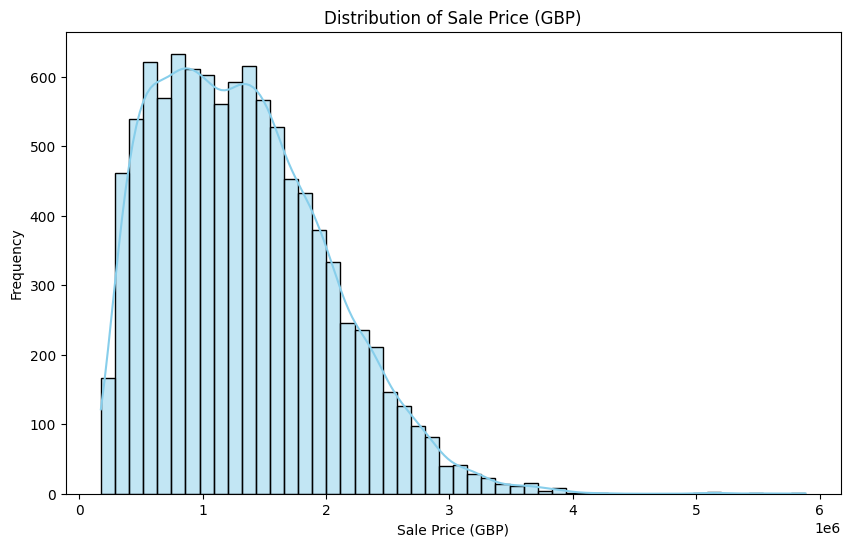

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Sale_Price_GBP'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Sale Price (GBP)')
plt.xlabel('Sale Price (GBP)')
plt.ylabel('Frequency')
plt.show()


In [13]:
from scipy.stats import skew

price_skew = skew(df['Sale_Price_GBP'])
print(f"Skewness of Sale_Price_GBP: {price_skew:.2f}")


Skewness of Sale_Price_GBP: 0.70


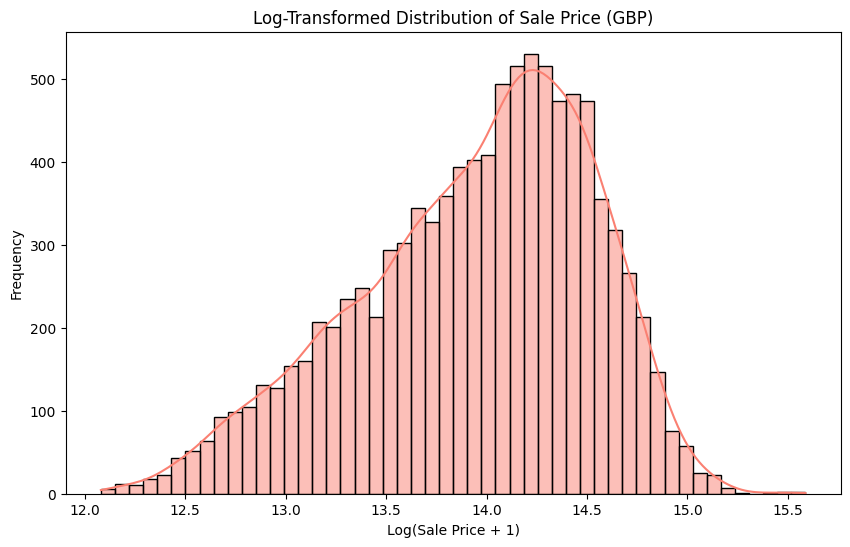

In [14]:
import numpy as np

df['Log_Sale_Price'] = np.log1p(df['Sale_Price_GBP'])  # log1p handles 0 safely

plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Sale_Price'], bins=50, kde=True, color='salmon')
plt.title('Log-Transformed Distribution of Sale Price (GBP)')
plt.xlabel('Log(Sale Price + 1)')
plt.ylabel('Frequency')
plt.show()

In [15]:
numeric_cols = ['Sale_Price_GBP','Square_Footage', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Build_Quality_Rating', 'Market_Trend_Index', 'Revenue_GBP_Monthly', 'Days_On_Market', 'Days_Since_Listed']

df[numeric_cols].corr()['Sale_Price_GBP'].sort_values(ascending=False)


,Sale_Price_GBP
Sale_Price_GBP,1.000000
Square_Footage,0.834981
Revenue_GBP_Monthly,0.245415
Market_Trend_Index,0.155964
Bedrooms,0.143445
Bathrooms,0.124344
Build_Quality_Rating,0.094254
Days_On_Market,0.017608
Year_Built,0.006997
Days_Since_Listed,-0.090033


In [16]:
df.groupby('Transaction_Type')['Sale_Price_GBP'].mean()

,Sale_Price_GBP
Transaction_Type,
Lease,1.331569e+06
Sale,1.319302e+06


In [17]:
df.groupby('Property_Type')['Sale_Price_GBP'].median()

,Sale_Price_GBP
Property_Type,
Apartment,1245822.35
Detached House,1247211.71
Townhouse,1256838.53


In [18]:
df['Location_District'].value_counts().head(10)

,count
Location_District,
Earley,535
Stoughton,496
Burpham,493
Kennet Island,491
Guildford Town Centre,486
Park Barn,478
Onslow Village,471
Coley,469
Whitley,459


In [19]:
df.groupby('Location_District')['Sale_Price_GBP'].mean().sort_values(ascending=False).head(10)

,Sale_Price_GBP
Location_District,
Islington,1.879965e+06
Kensington,1.855221e+06
Chelsea,1.697144e+06
Camden,1.366435e+06
Clapham,1.362797e+06
Ealing,1.355894e+06
Greenwich,1.346626e+06
Hackney,1.336045e+06
Richmond,1.330552e+06


<Axes: xlabel='Listing_Year'>

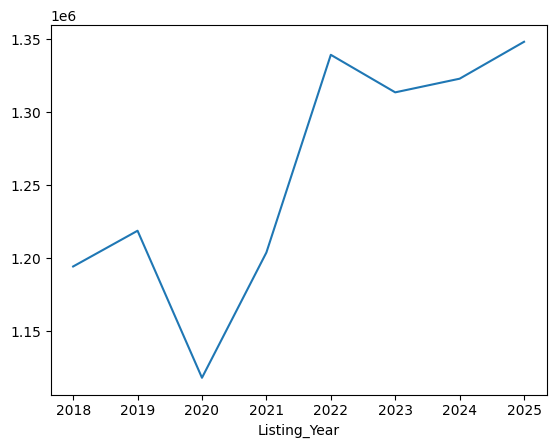

In [20]:
df.groupby('Listing_Year')['Sale_Price_GBP'].median().plot()


<Axes: xlabel='Listing_Month'>

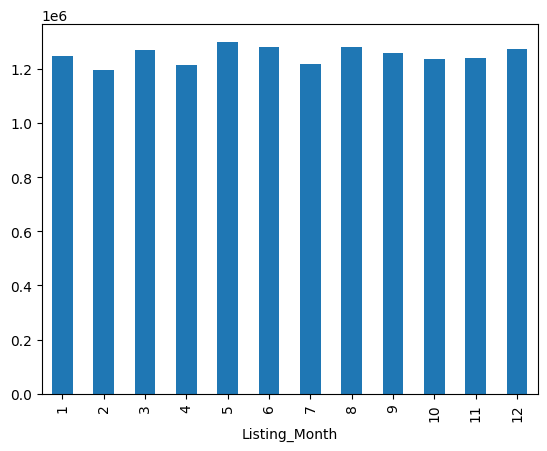

In [21]:
df.groupby('Listing_Month')['Sale_Price_GBP'].median().plot(kind='bar')


<Axes: xlabel='Agent_Commission_Percentage', ylabel='Sale_Price_GBP'>

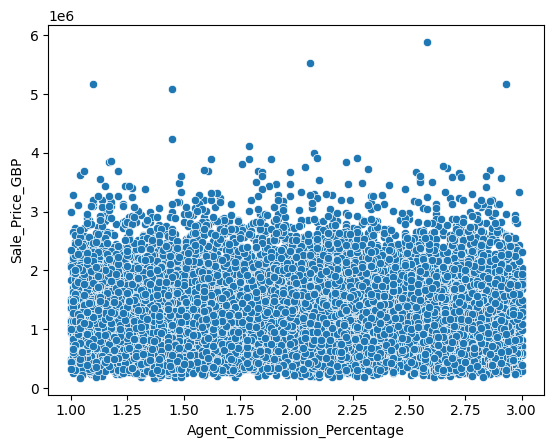

In [22]:
sns.scatterplot(data=df, x='Agent_Commission_Percentage', y='Sale_Price_GBP')


In [23]:
df[['Agent_Commission_Percentage', 'Sale_Price_GBP']].corr()


,Agent_Commission_Percentage,Sale_Price_GBP
Agent_Commission_Percentage,1.000000,0.004131
Sale_Price_GBP,0.004131,1.000000


In [24]:
df['Property_Age'] = df['Listing_Year'] - df['Year_Built']


<Axes: xlabel='Build_Quality_Rating', ylabel='Sale_Price_GBP'>

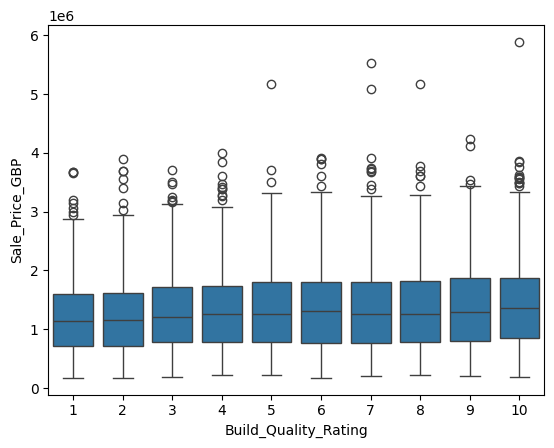

In [25]:
sns.boxplot(data=df, x='Build_Quality_Rating', y='Sale_Price_GBP')


<Axes: xlabel='Market_Trend_Index', ylabel='Sale_Price_GBP'>

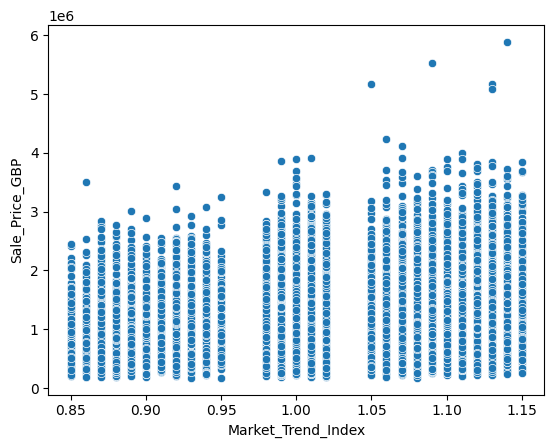

In [26]:
sns.scatterplot(data=df, x='Market_Trend_Index', y='Sale_Price_GBP')


<Axes: xlabel='Days_On_Market', ylabel='Sale_Price_GBP'>

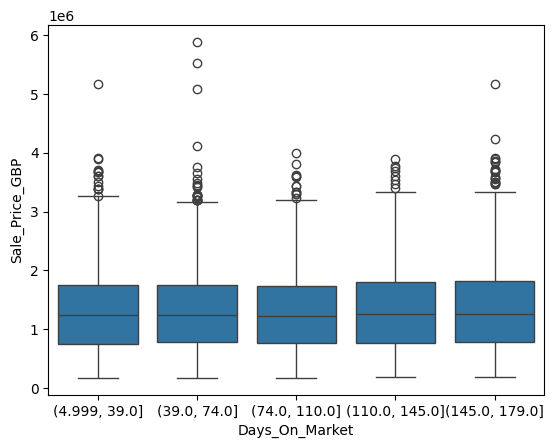

In [27]:
sns.boxplot(data=df, x=pd.qcut(df['Days_On_Market'], 5), y='Sale_Price_GBP')


<Axes: xlabel='Revenue_Activity', ylabel='Sale_Price_GBP'>

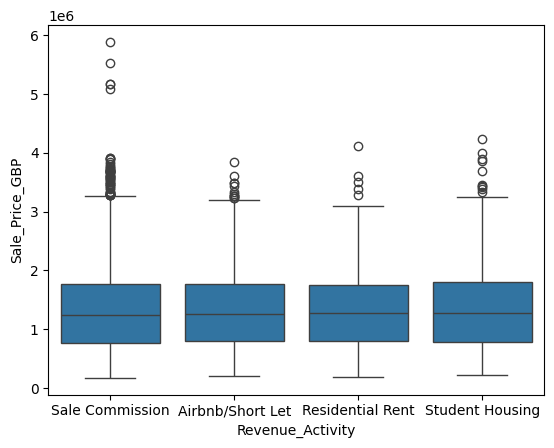

In [28]:
sns.boxplot(data=df, x='Revenue_Activity', y='Sale_Price_GBP')

<Axes: xlabel='Revenue_GBP_Monthly', ylabel='Sale_Price_GBP'>

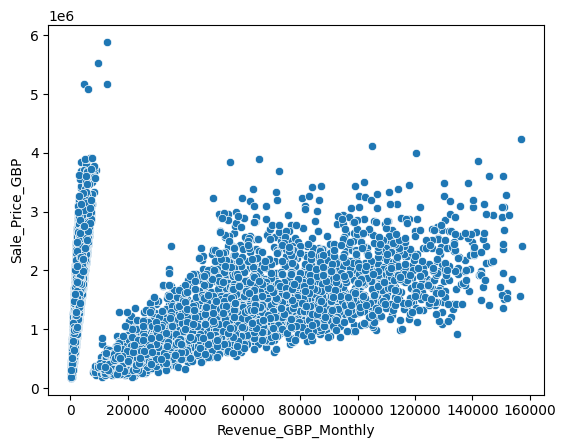

In [29]:
sns.scatterplot(data=df, x='Revenue_GBP_Monthly', y='Sale_Price_GBP')

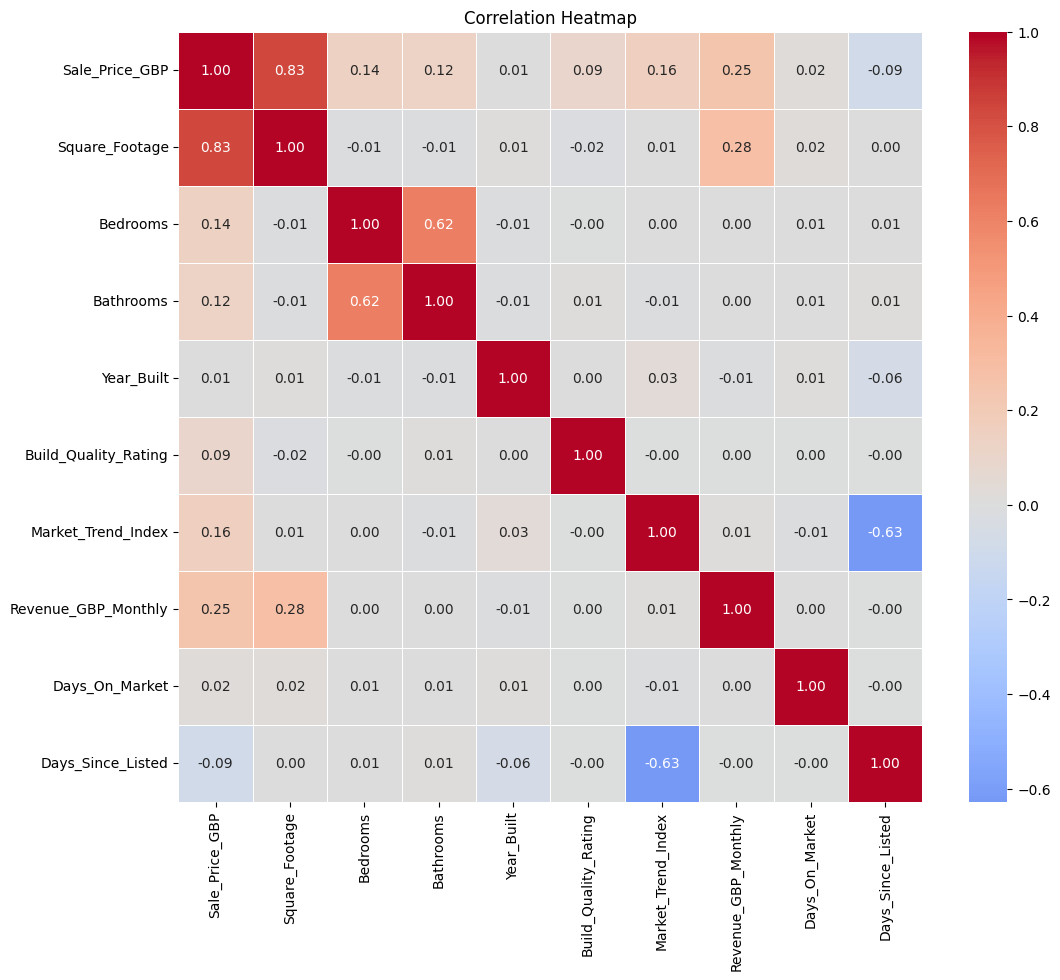

In [30]:
# Select specific numeric columns by name
selected_columns = [
    'Sale_Price_GBP',
    'Square_Footage',
    'Bedrooms',
    'Bathrooms',
    'Year_Built',
    'Build_Quality_Rating',
    'Market_Trend_Index',
    'Revenue_GBP_Monthly',
    'Days_On_Market',
    'Days_Since_Listed'
]

numeric_df = df[selected_columns]

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



# Feature Engineering

In [31]:
for col in ['Location_City', 'Location_District', 'Property_Type', 'Transaction_Type', 'Revenue_Activity']:
    print(f"{col}: {df[col].nunique()} unique values")

Location_City: 3 unique values
Location_District: 29 unique values
Property_Type: 3 unique values
Transaction_Type: 2 unique values
Revenue_Activity: 4 unique values


In [32]:
# One-Hot encoding
df_encoded = pd.get_dummies(df, columns=['Property_Type', 'Transaction_Type', 'Revenue_Activity'], drop_first=True)


In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Location_City'] = label_encoder.fit_transform(df['Location_City'])
df['Location_District'] = label_encoder.fit_transform(df['Location_District'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Location_City                10000 non-null  int64         
 1   Location_District            10000 non-null  int64         
 2   Listing_Date                 10000 non-null  datetime64[ns]
 3   Property_Type                10000 non-null  object        
 4   Square_Footage               10000 non-null  int64         
 5   Bedrooms                     10000 non-null  int64         
 6   Bathrooms                    10000 non-null  int64         
 7   Year_Built                   10000 non-null  int64         
 8   Build_Quality_Rating         10000 non-null  int64         
 9   Market_Trend_Index           10000 non-null  float64       
 10  Sale_Price_GBP               10000 non-null  float64       
 11  Agent_Commission_Percentage  10000 non-nul

In [35]:
df.head()

,Location_City,Location_District,Listing_Date,Property_Type,Square_Footage,Bedrooms,Bathrooms,Year_Built,Build_Quality_Rating,Market_Trend_Index,...,Agent_Commission_Percentage,Days_On_Market,Transaction_Type,Revenue_Activity,Revenue_GBP_Monthly,Listing_Year,Listing_Month,Days_Since_Listed,Log_Sale_Price,Property_Age
0,0,21,2024-04-04,Apartment,535,4,2,1991,1,1.08,...,2.07,49,Sale,Sale Commission,684.98,2024,4,510,12.891924,33
1,0,25,2020-08-20,Townhouse,3760,2,1,2006,1,0.85,...,2.30,105,Lease,Airbnb/Short Let,118517.69,2020,8,1833,14.350859,14
2,1,7,2022-07-07,Apartment,3038,1,1,1966,6,1.10,...,2.38,35,Sale,Sale Commission,3870.12,2022,7,1147,14.484018,56
3,2,16,2020-03-13,Detached House,2943,3,1,1977,4,0.93,...,1.94,74,Lease,Airbnb/Short Let,111895.23,2020,3,1993,14.343744,43
4,2,16,2024-01-17,Detached House,3284,3,2,1976,2,1.09,...,1.88,111,Sale,Sale Commission,2316.34,2024,1,588,14.206552,48


In [36]:
freq_encode_cols = ['Property_Type', 'Transaction_Type', 'Revenue_Activity']
for col in freq_encode_cols:
    freq_map = df[col].value_counts(normalize=True)
    df[col + '_FreqEnc'] = df[col].map(freq_map)
df.drop(columns=freq_encode_cols, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Location_City                10000 non-null  int64         
 1   Location_District            10000 non-null  int64         
 2   Listing_Date                 10000 non-null  datetime64[ns]
 3   Square_Footage               10000 non-null  int64         
 4   Bedrooms                     10000 non-null  int64         
 5   Bathrooms                    10000 non-null  int64         
 6   Year_Built                   10000 non-null  int64         
 7   Build_Quality_Rating         10000 non-null  int64         
 8   Market_Trend_Index           10000 non-null  float64       
 9   Sale_Price_GBP               10000 non-null  float64       
 10  Agent_Commission_Percentage  10000 non-null  float64       
 11  Days_On_Market               10000 non-nul

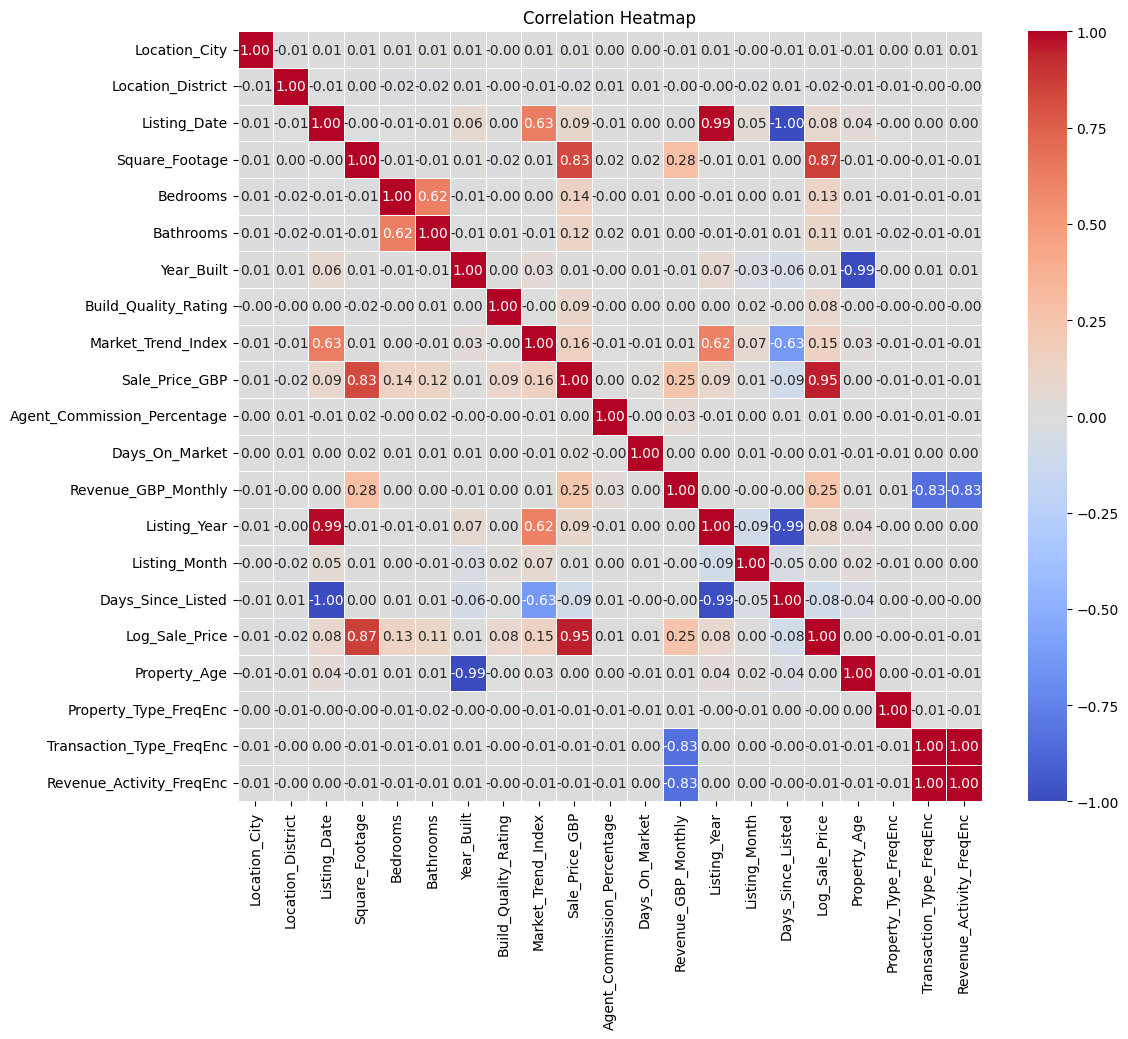

In [38]:

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Modelling

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Modelling

**Normal price and Log Price**

📉 Linear Regression (log scale)
  RMSE (log): 0.2618
  R² (log): 0.8010

📉 Random Forest (log scale)
  RMSE (log): 0.1448
  R² (log): 0.9391

📉 XGBoost (log scale)
  RMSE (log): 0.1314
  R² (log): 0.9499

💷 Linear Regression (price scale)
  RMSE: £364,459.84
  R²: 0.7177

💷 Random Forest (price scale)
  RMSE: £200,614.85
  R²: 0.9145

💷 XGBoost (price scale)
  RMSE: £180,416.34
  R²: 0.9308



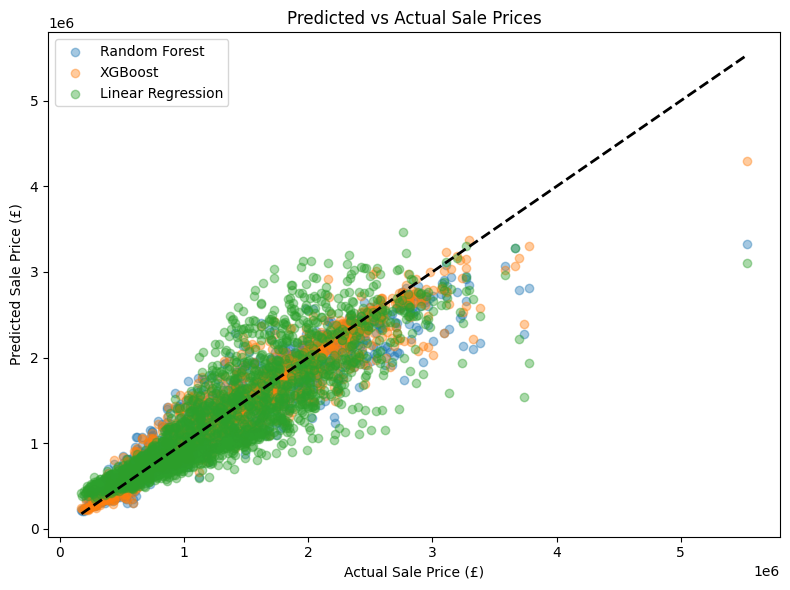

In [43]:
# 1. --- Features and new target ---
X = df.drop(['Sale_Price_GBP', 'Log_Sale_Price', 'Listing_Date'], axis=1)
y_log = df['Log_Sale_Price']  # Log target

# 2. --- Train-test split ---
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 3. --- Linear Regression (with scaling) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train_log)
y_pred_lr_log = lr.predict(X_test_scaled)

# 4. --- Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_log)
y_pred_rf_log = rf.predict(X_test)

# 5. --- XGBoost Regressor ---
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train_log)
y_pred_xgb_log = xgb.predict(X_test)

# 6. --- Evaluate Models on LOG scale ---
def evaluate_log_model(name, y_true_log, y_pred_log):
    rmse = np.sqrt(mean_squared_error(y_true_log, y_pred_log))
    r2 = r2_score(y_true_log, y_pred_log)
    print(f"📉 {name} (log scale)")
    print(f"  RMSE (log): {rmse:.4f}")
    print(f"  R² (log): {r2:.4f}")
    print()

evaluate_log_model("Linear Regression", y_test_log, y_pred_lr_log)
evaluate_log_model("Random Forest", y_test_log, y_pred_rf_log)
evaluate_log_model("XGBoost", y_test_log, y_pred_xgb_log)

# 7. --- Convert log predictions back to price scale ---
# Use np.expm1 if you used np.log1p to create Log_Sale_Price
y_test_price = np.exp(y_test_log)
y_pred_lr_price = np.exp(y_pred_lr_log)
y_pred_rf_price = np.exp(y_pred_rf_log)
y_pred_xgb_price = np.exp(y_pred_xgb_log)

# 8. --- Evaluate back on actual price scale ---
def evaluate_price_scale(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"💷 {name} (price scale)")
    print(f"  RMSE: £{rmse:,.2f}")
    print(f"  R²: {r2:.4f}")
    print()

evaluate_price_scale("Linear Regression", y_test_price, y_pred_lr_price)
evaluate_price_scale("Random Forest", y_test_price, y_pred_rf_price)
evaluate_price_scale("XGBoost", y_test_price, y_pred_xgb_price)

# 9. --- Optional: Plot actual vs predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test_price, y_pred_rf_price, label='Random Forest', alpha=0.4)
plt.scatter(y_test_price, y_pred_xgb_price, label='XGBoost', alpha=0.4)
plt.scatter(y_test_price, y_pred_lr_price, label='Linear Regression', alpha=0.4)
plt.plot([y_test_price.min(), y_test_price.max()],
         [y_test_price.min(), y_test_price.max()], 'k--', lw=2)
plt.xlabel("Actual Sale Price (£)")
plt.ylabel("Predicted Sale Price (£)")
plt.title("Predicted vs Actual Sale Prices")
plt.legend()
plt.tight_layout()
plt.show()


**Save the beest model for deployment**

In [44]:
import joblib

# Save XGBoost model
joblib.dump(xgb, 'xgb_log_price_model.pkl')


['xgb_log_price_model.pkl']

**Feature Importance**

In [45]:
import pandas as pd

# Create a pandas Series with feature importances
xgb_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)

# Sort by importance
xgb_importances_sorted = xgb_importances.sort_values(ascending=False)

# Show top 10
print("📊 Top 10 Features Predicting Log(Sale Price):")
print(xgb_importances_sorted.head(10))


📊 Top 10 Features Predicting Log(Sale Price):
Square_Footage                 0.755320
Revenue_GBP_Monthly            0.045946
Agent_Commission_Percentage    0.032374
Bedrooms                       0.030216
Market_Trend_Index             0.023574
Bathrooms                      0.018515
Build_Quality_Rating           0.017117
Location_District              0.015070
Revenue_Activity_FreqEnc       0.009344
Days_Since_Listed              0.008610
dtype: float32


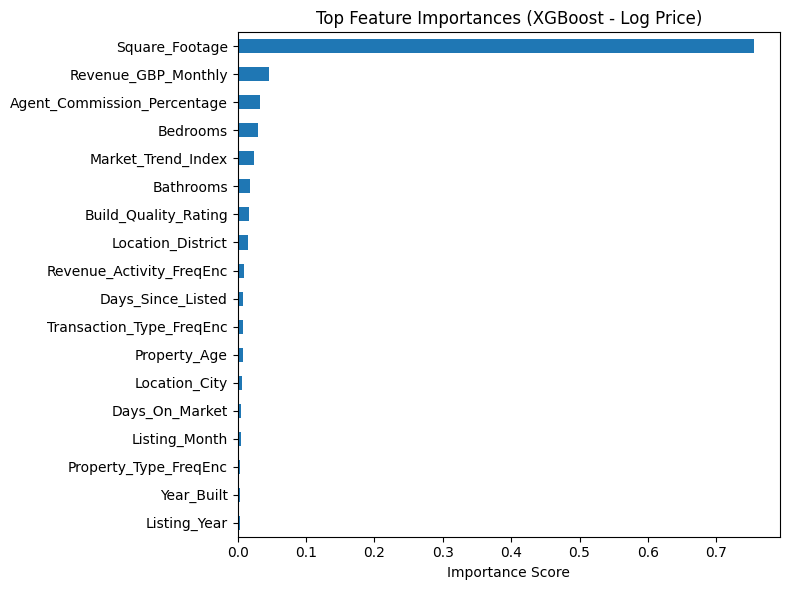

In [47]:
import matplotlib.pyplot as plt

# Plot top 15 features
top_n = 20
xgb_importances_sorted.head(top_n).plot(kind='barh', figsize=(8, 6), title='Top Feature Importances (XGBoost - Log Price)')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


# Modelling